# Yahoo Finances

In [17]:
from matplotlib import pyplot as plt
from pandas_datareader import data
from sklearn.linear_model import LinearRegression

import datetime
import numpy as np
import pandas as pd

In [4]:
# Define the instruments to download. 
# We would like to see Apple, Microsoft and the S&P500 index.
# FB = Facebook
tickers = ['AAPL', 'MSFT', '^GSPC', 'FB']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2016-12-25'
end_date = '2017-12-25'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [5]:
close = panel_data.ix['Close']

/home/xmn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


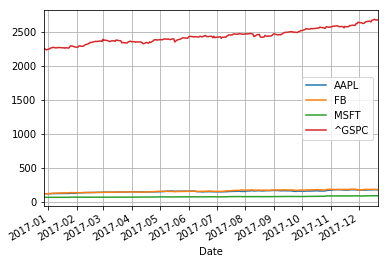

In [6]:
close.plot()
plt.grid(True)
plt.show()

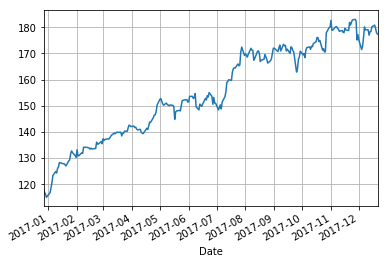

In [7]:
fb_close = close['FB'].sort_index(ascending=True)
fb_close.plot()
plt.grid(True)
plt.show()

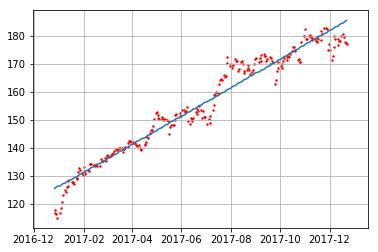

In [9]:
model = LinearRegression(fit_intercept=True)

y = fb_close.values
x = fb_close.reset_index().index
s = fb_close.size # size

x_shared = fb_close.index.values

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, s-1, s)
yfit = model.predict(xfit[:, np.newaxis])

# data
plt.scatter(x_shared, y, s=2, color='red')
# prediction
plt.plot(x_shared, yfit)
plt.grid(True)
plt.show()

## Preparing data

In [15]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
adj_close = panel_data.ix['Adj Close']

adj_close.describe()

,AAPL,FB,MSFT,^GSPC
count,251.000000,251.000000,251.000000,251.000000
mean,148.624815,155.613386,70.893860,2442.234226
std,15.548185,17.889339,7.252827,108.114147
min,113.986984,115.050003,60.782795,2238.830078
25%,139.676521,140.155006,64.128163,2363.724976
50%,150.010727,153.240005,69.686882,2433.149902
75%,158.791077,171.529998,74.391400,2506.844971
max,176.419998,183.029999,86.849998,2690.159912


In [22]:
# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex adj_close using all_weekdays as the new index
adj_close = adj_close.reindex(all_weekdays, method='ffill')

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
# adj_close = adj_close.fillna(method='ffill')
adj_close.describe()

,AAPL,FB,MSFT,^GSPC
count,260.000000,260.000000,260.000000,260.000000
mean,148.530240,155.407385,70.857241,2441.523734
std,15.790800,18.070323,7.307557,109.346680
min,113.986984,115.050003,60.782795,2238.830078
25%,139.419540,139.935001,64.002696,2362.940002
50%,149.950584,152.994995,69.573055,2432.839966
75%,158.931526,171.602497,74.388914,2506.747436
max,176.419998,183.029999,86.849998,2690.159912


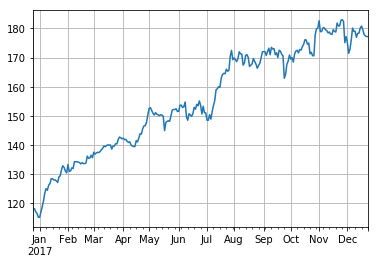

In [25]:
adj_close['FB'].plot()
plt.grid(True)
plt.show()

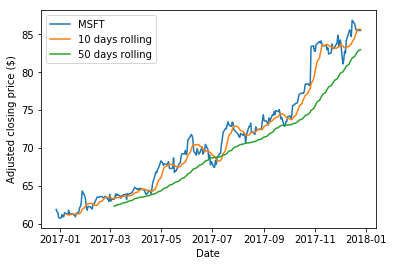

In [29]:
# Get the MSFT time series. This now returns a Pandas Series object indexed by date.
msft = adj_close.ix[:, 'MSFT']
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=10).mean()
long_rolling_msft = msft.rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='10 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='50 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

plt.show()

## References

* http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/